#**Project Title:**
Predicting probability of fatal heart disease in patients based on different risk factors

#Reference to Data Source

##**Heart Failure Clinical Data:**
Creator Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). Original Publication https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

#**Features Explanation:**
age: Age of the patient

Anaemia: Decrease of red blood cells or hemoglobin (0 = no, 1 = yes)

High blood pressure: If a patient has hypertension (0 = no, 1 = yes)

Creatinine phosphokinase (CPK): Level of the CPK enzyme in the blood (range from 23mcg/L to 7861mcg/L)

Diabetes: If the patient has diabetes (0 = no, 1 = yes)

Ejection fraction: Percentage of blood leaving (range from 14% to 80%)

sex: The person's sex (1 = male, 0 = female)

Platelets: Platelets in the blood (range from 25 kiloplatelets/mL to 850 kiloplatelets/mL)

Serum creatinine: Level of creatinine in the blood (range from 0.50mg/dL to 9.40mg/dL)

Serum sodium: Level of sodium in the blood (range from 114mEq/L to 148mEq/L)

Smoking: If the patient smokes (0 = no, 1 = yes)

Time: Follow-up period (range from 4 days to 285 days)

(target) death event: If the patient died during the follow-up period (0 = no, 1 = yes)


**Boolean features**

  - Sex: Gender of patient Male = 1, Female =0
  - Diabetes: 0 = No, 1 = Yes
  - Anaemia: 0 = No, 1 = Yes
  - High_blood_pressure: 0 = No, 1 = Yes
  - Smoking: 0 = No, 1 = Yes
  - DEATH_EVENT: 0 = No, 1 = Yes

>Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

>Most cardiovascular diseases can be prevented by addressing behavioral risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity, and harmful use of alcohol using population-wide strategies.

>People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidemia, or already established disease).

In [7]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import plotly.graph_objs as go

#Explore Data Analysis 
## First, we obtained a brief overview of the dataset and its stucture.

In [5]:
clinical = pd.read_csv('https://raw.githubusercontent.com/laiz6660666/BA765-Session02/master/heart_failure_clinical_records_dataset.csv')
clinical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


>We have 299 observations with 12 features. it seems to be cleaned since there is no NAN value.

>Described table for all patients with Heart Failure issue

In [ ]:
clinical.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


>Described table for all Heart Failure patients with Death Event

In [4]:
round(clinical[clinical['DEATH_EVENT']==1].describe(),2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.0
mean,65.22,0.48,670.20,0.42,33.47,0.41,256381.04,1.84,135.38,0.65,0.31,70.89,1.0
std,13.21,0.50,1316.58,0.50,12.53,0.49,98525.68,1.47,5.00,0.48,0.47,62.38,0.0
min,42.00,0.00,23.00,0.00,14.00,0.00,47000.00,0.60,116.00,0.00,0.00,4.00,1.0
25%,55.00,0.00,128.75,0.00,25.00,0.00,197500.00,1.08,133.00,0.00,0.00,25.50,1.0
50%,65.00,0.00,259.00,0.00,30.00,0.00,258500.00,1.30,135.50,1.00,0.00,44.50,1.0
75%,75.00,1.00,582.00,1.00,38.00,1.00,311000.00,1.90,138.25,1.00,1.00,102.25,1.0
max,95.00,1.00,7861.00,1.00,70.00,1.00,621000.00,9.40,146.00,1.00,1.00,241.00,1.0


> - what we understand from these two tables,Although there are not big diffrence between min and max which means there is same age interval but mean and std have significantly increased. it shows age variable plays a primarily role.

## After getting an idea of what the data looked like and confirming the data was tidy, we moved on to visualizing the data. This helped us find relationships between attributes and get a deeper understanding of the issue at hand.


# Finding which features are related to each other: 

> The following heatmap shows the correlation between each feature
> - The higher the correlation coefficient means these two variables are more dependent to each other.
> - This will show us which attribute pairs we should focus on more deeply later in the notebook.





#**Correlation between features** 

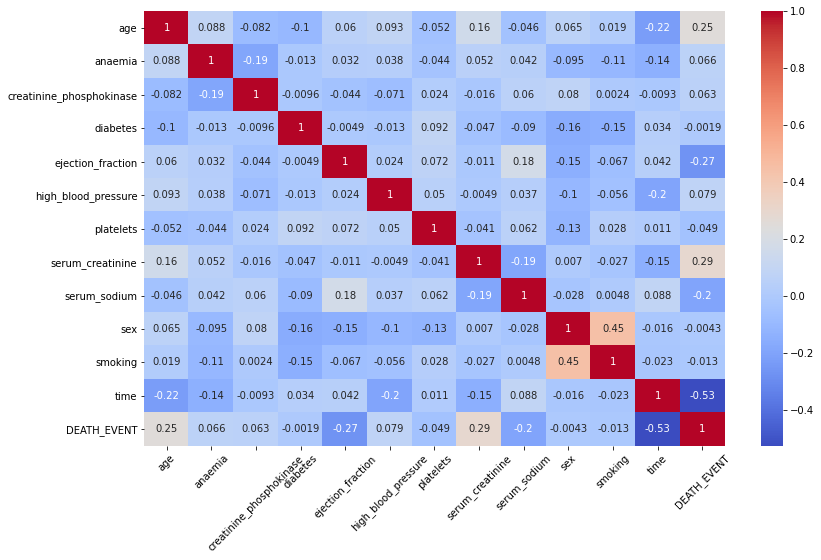

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(clinical.corr(), annot = True, cmap = 'coolwarm')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
correlation = clinical.corr()
corr_target = abs(correlation['DEATH_EVENT'])
critical_features = corr_target[corr_target > 0.1]
critical_features

age                  0.253729
ejection_fraction    0.268603
serum_creatinine     0.294278
serum_sodium         0.195204
time                 0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

We decided to segment those variables that were most correlated to Death Event, taking any variable that had a correlation coefficient greater than 0.1.

### Finding where our data points were located and initial relationship between attributes:


> We decided to graph a pairplot for each attribute to observe tendencies,distributions and relationships between the highest correlated attributes.



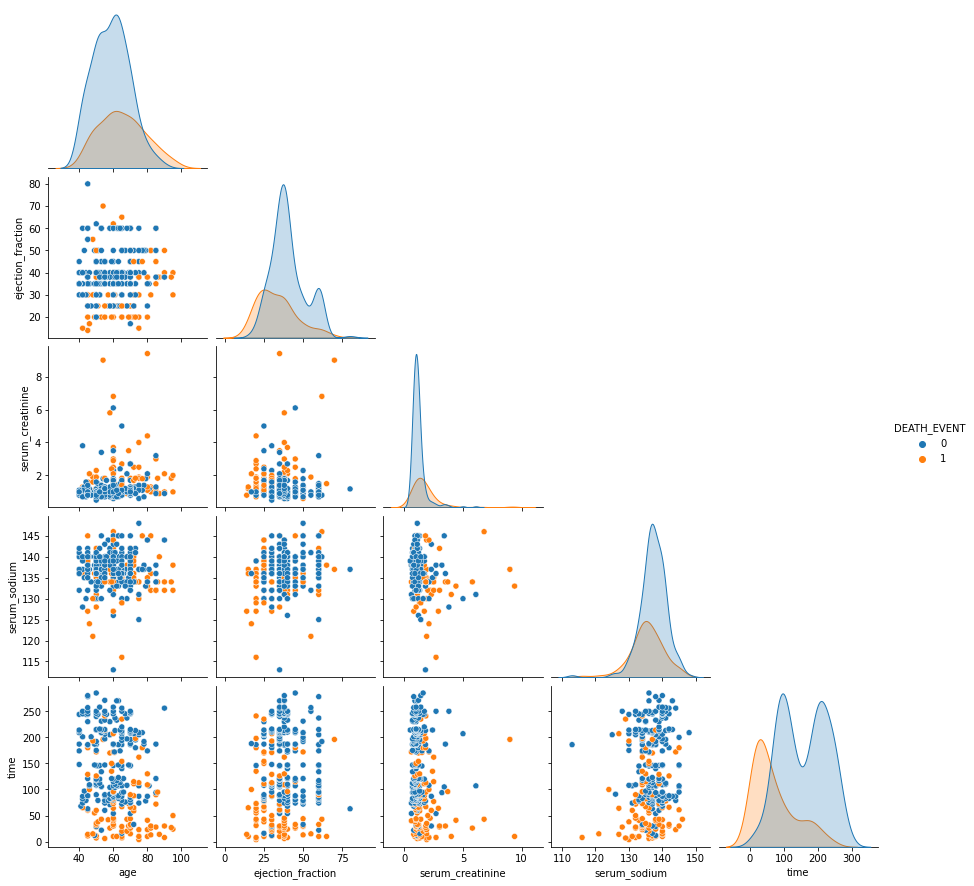

In [ ]:
# clinical.hist(figsize=(20, 24), bins=50, xlabelsize=8, ylabelsize=8)
clinical_for_pp = clinical[['age','ejection_fraction','serum_creatinine','serum_sodium','time','DEATH_EVENT']]    
sns.pairplot(data=clinical_for_pp,corner=True,kind='scatter',hue='DEATH_EVENT')

#### Findings:
- We can see some initial tendencies such as age being a factor on wether a patient survives.
- We also observe most patients who perished had lower ejection fraction levels.
- Patients with shorter time between checkups look to have higher mortality, but this could be due to the fact that a patient that is observed to be in worse condition could be scheduled more consistent check ups.

Using this as a base, we decided to dig deeper to find other relationships between attributes and explore those we see already.

#### Digging deeper into the attributes highly correlated with Death Event, we decided to look into Serum Creatinine levels first.

>We graphed the distribution of the attribute below to understand what our sample looked like in more detail.


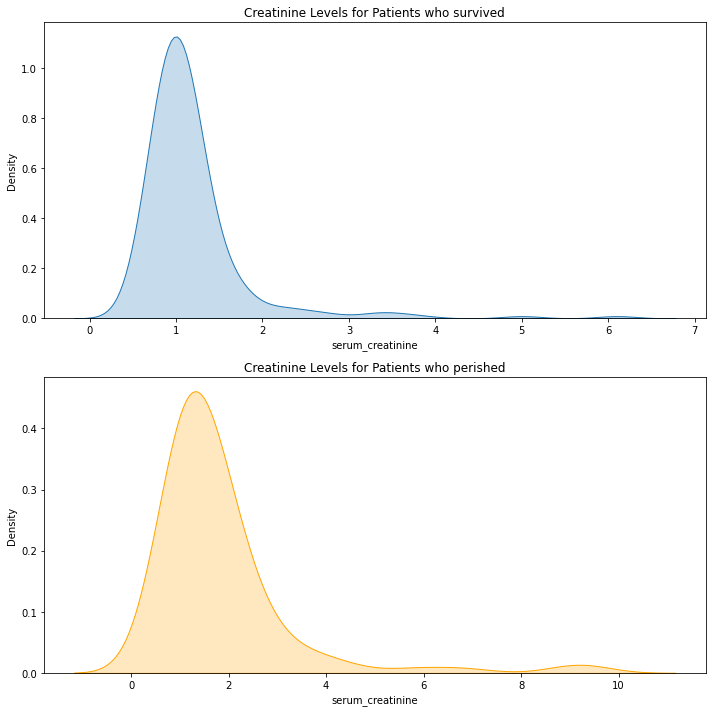

In [ ]:
# clinical.creatinine_phosphokinase.hist(bins=50,range=(0, 1000))
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
g = sns.kdeplot(data=clinical.loc[clinical['DEATH_EVENT']==0],x='serum_creatinine',fill=True)
g.set_title('Creatinine Levels for Patients who survived')
plt.tight_layout()
plt.subplot(2,1,2)
g1 = sns.kdeplot(data=clinical.loc[clinical['DEATH_EVENT']==1],x='serum_creatinine',color='orange',fill=True)
g1.set_title('Creatinine Levels for Patients who perished')
plt.tight_layout()


Although difficult to observe, this graphs show that patients who perished had higher levels of creatinine in their blood.

#### We then moved on to analyzing the distribution of ages within patients in our dataset.

>* The age histogram below shows that the patients within the age group [54,61] are more likely to have heart failure.
>*   As the age grows, patients will have higher and higher chance of dying from the disease.












Text(0.5, 1.0, 'Distribution of Age Groups in Sample')

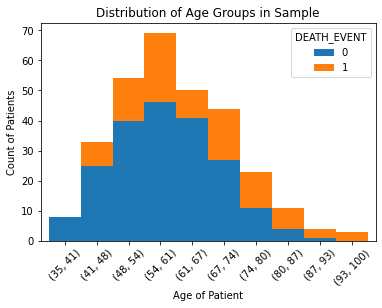

In [6]:
def hist(x):
    h, e = np.histogram(x.dropna(), range=(35, 100))
    e = e.astype(int)
    return pd.Series(h, zip(e[:-1], e[1:]))

kw = dict(stacked=True, width=1, rot=45)
clinical.groupby('DEATH_EVENT').age.apply(hist).unstack(0).plot.bar(**kw)
plt.xlabel('Age of Patient')
plt.ylabel('Count of Patients')
plt.title('Distribution of Age Groups in Sample',)

In [9]:
fig = px.box(clinical, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.show()

In [11]:
male = clinical[clinical["sex"]==1]
female = clinical[clinical["sex"]==0]

male_survi = male[clinical["DEATH_EVENT"]==0]
male_not = male[clinical["DEATH_EVENT"]==1]
female_survi = female[clinical["DEATH_EVENT"]==0]
female_not = female[clinical["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[clinical["DEATH_EVENT"]==0]),len(male[clinical["DEATH_EVENT"]==1]),
         len(female[clinical["DEATH_EVENT"]==0]),len(female[clinical["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/us

#### We also decided to dig deeper into other attributes that had a lower correlation coefficient with Death Event, to try and find hidden relationships in the data, and overall gather a better understanding of the dataset.

Looking at the number of patients who suffered from anaemia we found that patients with anaemia have a higher chance of death, as can be seen in the graph below.

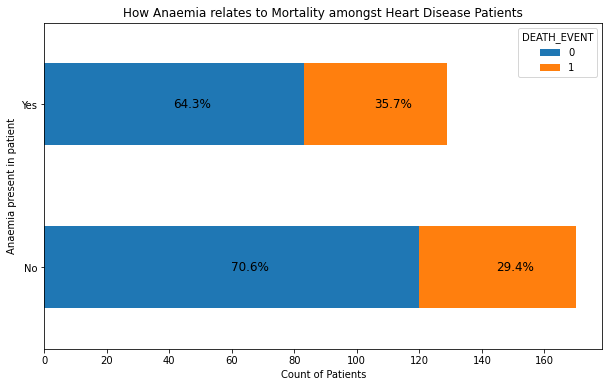

In [ ]:
anaemia = clinical.groupby('anaemia')['DEATH_EVENT'].value_counts()[1]
non_anaemia = clinical.groupby('anaemia')['DEATH_EVENT'].value_counts()[0]
anaemia = anaemia*(100/anaemia.sum())
non_anaemia = non_anaemia*(100/non_anaemia.sum())
df2 = pd.DataFrame(np.array([list(anaemia), list(non_anaemia)]), index = ['anaemia', 'non_anaemia'], columns = ['No', 'Yes'])

ax = clinical.groupby('anaemia')['DEATH_EVENT'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(10, 6))
ax.set_ylabel("Anaemia present in patient")
plt.yticks(labels=['No','Yes'],ticks=[0,1])
plt.title('How Anaemia relates to Mortality amongst Heart Disease Patients')
plt.xlabel('Count of Patients')

# Set txt
kx = -0.3
ky = -0.02

values = [70.58823529411765, 64.34108527131784, 29.411764705882355, 35.65891472868217]

for i,rec in enumerate(ax.patches):
    ax.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()/2+ky,'{:.1%}'.format(values[i]/100), fontsize=12, color='black')


#### Seeing how it was more likely for patients with anaemia to perish, we decided to investigate and see if we found a similar pattern in patients with diabetes.
> We found that diabetes has little impact on the death rate of patients with heart failure, as the patients with and without diabetes have approximately the same probability of dying.



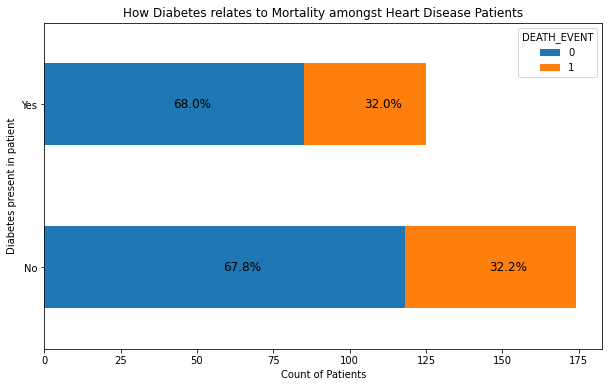

In [ ]:
diabetes = clinical.groupby('diabetes')['DEATH_EVENT'].value_counts()[1]
non_diabetes = clinical.groupby('diabetes')['DEATH_EVENT'].value_counts()[0]
diabetes = diabetes*(100/diabetes.sum())
non_diabetes = non_diabetes*(100/non_diabetes.sum())
df2 = pd.DataFrame(np.array([list(anaemia), list(non_anaemia)]), index = ['diabetes', 'non_diabetes'], columns = ['No', 'Yes'])

ax = clinical.groupby('diabetes')['DEATH_EVENT'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(10, 6))
ax.set_ylabel("Diabetes present in patient")
plt.yticks(labels=['No','Yes'],ticks=[0,1])
plt.title('How Diabetes relates to Mortality amongst Heart Disease Patients')
plt.xlabel('Count of Patients')

# Set txt
kx = -0.3
ky = -0.02

values = [67.816092, 68.000000, 32.183908, 32.000000]

for i,rec in enumerate(ax.patches):
    ax.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()/2+ky,'{:.1%}'.format(values[i]/100), fontsize=12, color='black')

#### We then moved on to analyzing if smoking was an important factor for a patients mortality. 
> Interestingly, we found that whether the patient was a smoker or not, has little impact on the mortality rate of heart failure, at least based on our dataset.


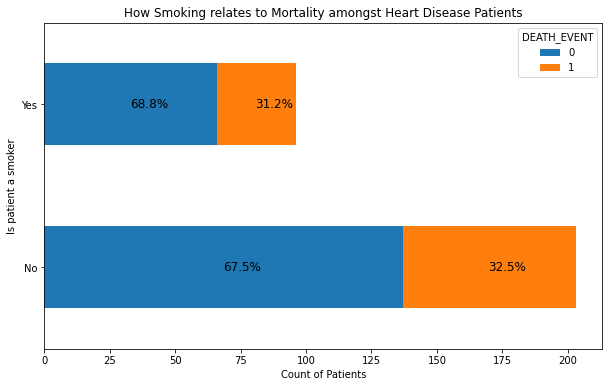

In [ ]:
smoking = clinical.groupby('smoking')['DEATH_EVENT'].value_counts()[1]
non_smoking = clinical.groupby('smoking')['DEATH_EVENT'].value_counts()[0]
smoking = smoking*(100/smoking.sum())
non_smoking = non_smoking*(100/non_smoking.sum())
df2 = pd.DataFrame(np.array([list(smoking), list(non_smoking)]), index = ['smoking', 'non_smoking'], columns = ['No', 'Yes'])

ax = clinical.groupby('smoking')['DEATH_EVENT'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(10, 6))
ax.set_ylabel("Is patient a smoker")
plt.yticks(labels=['No','Yes'],ticks=[0,1])
plt.title('How Smoking relates to Mortality amongst Heart Disease Patients')
plt.xlabel('Count of Patients')

# Set txt
kx = -0.3
ky = -0.02

values = [67.487685, 68.750000, 32.512315, 31.250000]

for i,rec in enumerate(ax.patches):
    ax.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()/2+ky,'{:.1%}'.format(values[i]/100), fontsize=12, color='black')

#### We continued our analysis, now focusing on the possible effect high blood pressure levels could have on the mortality of a patient.
>We found that patients with high blood pressure are more likely to die from heart disease than those without.


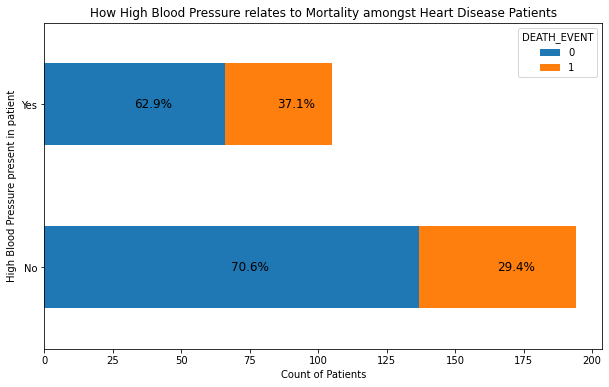

In [ ]:
high_blood_pressure = clinical.groupby('high_blood_pressure')['DEATH_EVENT'].value_counts()[1]
non_high_blood_pressure = clinical.groupby('high_blood_pressure')['DEATH_EVENT'].value_counts()[0]
high_blood_pressure = high_blood_pressure*(100/high_blood_pressure.sum())
non_high_blood_pressure = non_high_blood_pressure*(100/non_high_blood_pressure.sum())
df2 = pd.DataFrame(np.array([list(high_blood_pressure), list(non_high_blood_pressure)]), index = ['high_blood_pressure', 'non_high_blood_pressure'], columns = ['No', 'Yes'])

ax = clinical.groupby('high_blood_pressure')['DEATH_EVENT'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(10, 6))
ax.set_ylabel("High Blood Pressure present in patient")
plt.yticks(labels=['No','Yes'],ticks=[0,1])
plt.title('How High Blood Pressure relates to Mortality amongst Heart Disease Patients')
plt.xlabel('Count of Patients')
# Set txt
kx = -0.3
ky = -0.02

values = [70.618557, 62.857143, 29.381443, 37.142857]

for i,rec in enumerate(ax.patches):
    ax.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()/2+ky,'{:.1%}'.format(values[i]/100), fontsize=12, color='black')

# After analyzing these attributes individually, we decided to look into any relationships that might exists between these variables.


#Serum Creatinine vs. Serum Sodium


> - As we see on the scatterplot, the death event concentrated on serum creatinine level between 2mg/dL and 4mg/dL & serum sodium level between 125mEq/L and 135mEq/L
> - Patients are more likely to die when serum creatinine level above 6mg/dL





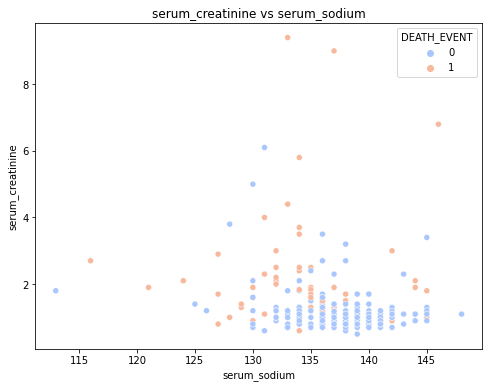

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='serum_sodium',y='serum_creatinine',data=clinical,hue='DEATH_EVENT', palette='coolwarm')
plt.title('serum_creatinine vs serum_sodium')
plt.show()


#Serum Creatinine - Age

> - As we see on the scatterplot, the death event concentrated on serum creatinine level = 2mg/dL and age is above 70 years old

> - Patients are more likely to die when serum creatinine level is high than or age is larger than 70 years old






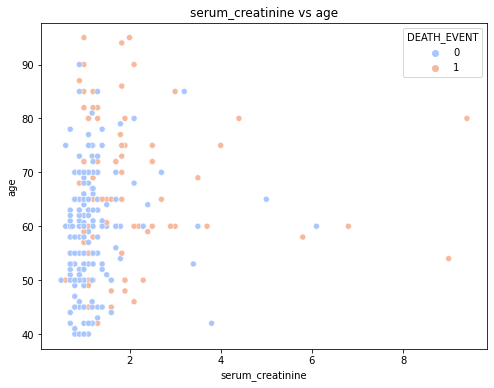

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(y='age',x='serum_creatinine',data=clinical,hue='DEATH_EVENT', palette='coolwarm')
plt.title('serum_creatinine vs age')
plt.show()

#Age vs. Ejection fraction

> - As we see on the scatterplot, the death event concentrated on ejection fraction from 20 to 30, and most patients who died are in the range of 50 year-old to 80 year-old
> - Patients are more likely to die when ejection fraction below 40, which at lower level compare to those who alive

<Figure size 576x432 with 0 Axes>

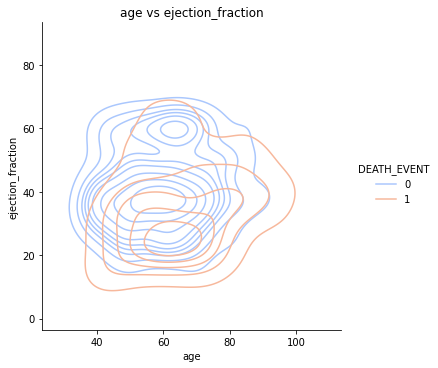

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(y='ejection_fraction',x='age',data=clinical,hue='DEATH_EVENT', palette='coolwarm',kind='kde')
plt.title('age vs ejection_fraction')
plt.show()

#Age vs. Time

<Figure size 576x432 with 0 Axes>

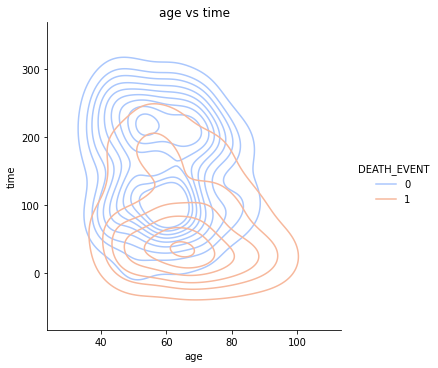

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(y='time',x='age',data=clinical,hue='DEATH_EVENT', palette='coolwarm',kind='kde')
plt.title('age vs time')
plt.show()

#**Machine Learning Models**

#Feature Importance

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

X, y = clinical(return_X_y=True)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=775)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=775)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=775
)
clf.fit(X_train, y_train).score(X_test, y_test)

In [ ]:
params = {'random_state': 775, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 8}

x, y = clinical.drop('DEATH_EVENT',axis=1), clinical['DEATH_EVENT']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

#**Random Forest Classifier**


In [ ]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=775)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=775)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#**Linear Regression**

In [ ]:
drop = ['DEATH_EVENT','creatinine_phosphokinase']

In [ ]:
X, y = clinical.drop(drop,axis=1), clinical['DEATH_EVENT']

In [ ]:
Features = ['time','ejection_fraction','serum_creatinine']

In [ ]:
Features = ['ejection_fraction','serum_creatinine']

In [ ]:
X, y = clinical[Features], clinical['DEATH_EVENT']

In [ ]:
x, y = clinical.drop('DEATH_EVENT',axis=1), clinical['DEATH_EVENT']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=775)

In [ ]:
from sklearn.linear_model import LogisticRegression  # 1. choose model class
model = LogisticRegression(solver='liblinear')     # 2. instantiate model

In [ ]:
model.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_model = model.predict(Xtest)

In [ ]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

,index,time,ejection_fraction,serum_creatinine,DEATH_EVENT,predicted
0,159,121,45,1.1,0,0
1,26,24,40,1.0,1,1
2,50,43,25,1.0,1,1
3,233,209,38,1.4,0,0
4,256,220,38,1.7,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8111111111111111

#**K Neighbor Classifier**

In [ ]:
# K Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(Xtrain, ytrain)
kn_pred = kn_clf.predict(Xtest)
kn_acc = accuracy_score(ytest, kn_pred)


In [ ]:
kn_acc

0.7111111111111111

#**Gaussian NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()             # 2. instantiate model
model.fit(Xtrain, ytrain)           # 3. fit model to data
y_model = model.predict(Xtest)        # 4. predict on new data

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.7